## Lab Assignment 2 - 220012316

https://github.com/elizadana29/Lab2?tab=readme-ov-file#lab2

#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start!

In [2]:
# Part One - Python Basics

In [3]:
# Task One - Creating an "If...Else" Statement testing if a number is divisible by 3
#define number
number=15
#create if else statememt
if number % 3 == 0:
   print(f"{number} is divisible by 3.")
else:
    print (f"{number} is not divisible by 3.")
    

15 is divisible by 3.


In [4]:
# Task Two - Creating an If...Else" Statement testing whether a fruit is in a list of acceptable fruits

#define fruit and list 
fruit='banana'
list = ['apple', 'orange', 'pear', 'kiwi', 'strawberry']
#create if else statement
if fruit in list:
    print(f"{fruit} is acceptable.")
else:
    print (f"{fruit} is not acceptable.")

banana is not acceptable.


In [5]:
# Task 3 - Calculating the distance between two coordinates using the Haversine formula.
import math

# Define the function
def haversine(coord1, coord2):
    #Earth's radius is in kilometers
    R = 6371.0 
    
    # Define latitiude and longitude
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    # Convert to radians 
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Coordinates in radians
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])

    # Differencing coordinate
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine input
    a = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c = 2*math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Distance in kilometers
    distance = R*c
    return distance

#Define coordinates
coord1 = [51.5074, 0.1278] #London
coord2 = [33.8688, 151.2093] #Sydney

# Calculate distance
distance = haversine(coord1, coord2)
print(f"the distance between the coordinates is {distance:.2f} km.")


the distance between the coordinates is 10110.58 km.


In [6]:
#Part 2: Pandas and NumPy

In [7]:
#Load the dataset
dataset = '/arcgis/home/portland_park_trees.csv'

In [ ]:
pip install contextily

In [ ]:
pip install mapclassify

In [ ]:
pip install geopandas

In [11]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [12]:
# Read the dataset
dataset = pd.read_csv('/arcgis/home/portland_park_trees.csv')

In [13]:
# Visualize the dataset
dataset.head()

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."
3,4,429,2017/05/09,QURU,10.3,Poor,28.0,38.0,31.0,staff,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
4,5,430,2017/05/09,PSME,33.2,Fair,102.0,43.0,44.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


In [ ]:
# Gather information about dataset
dataset.info()

In [15]:
# Question 1: Find the number of trees that are of the Quercus or Acer Genus
QuerAceTrees = dataset [(dataset ['Genus'] == 'Quercus') | (dataset ['Genus'] == 'Acer')]

# Count the number of trees in the above dataset
treecount = QuerAceTrees.shape [0]
print ("Number of trees of the Quercus or Acer Genus:", treecount)

Number of trees of the Quercus or Acer Genus: 5675


In [16]:
# Question 2: Find number of trees that are of the Quercus or Acer Genus and have a DBH larger than 50 inches
#Define DBH
DBH = dataset ['DBH']
#Count number of trees in dataset
treecount2 = QuerAceTrees [QuerAceTrees ['DBH'] > 50]
treecount2number = treecount2.shape [0]
print("Number of trees of the Quercus or Acer Genus with a DBH larger than 50 inches:", treecount2number)

Number of trees of the Quercus or Acer Genus with a DBH larger than 50 inches: 124


In [17]:
# Question 3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

# Isolate the Quercus Genus
Quercus = dataset[dataset['Genus'] == 'Quercus']
#Calculate the Mean DBH for Quercus
QuercusMeanDBH = Quercus['DBH'].mean()

# Isolate the Acer Genus
Acer = dataset[dataset['Genus'] == 'Acer']
#Calculate the Mean DBH for Acer
AcerMeanDBH = Acer['DBH'].mean()

# Isolate the Fraxinus Genus
Fraxinus = dataset[dataset['Genus'] == 'Fraxinus']
#Calculate the Mean DBH for Quercus
FraxinusMeanDBH = Fraxinus['DBH'].mean()

#Create a dictionary of the mean DBH values
MeanDBHValues = {
    'Quercus': QuercusMeanDBH,
    'Acer': AcerMeanDBH,
    'Fraxinus': FraxinusMeanDBH
}

#Find the genus with the highest mean DBH
HighestAvgDBH = max(MeanDBHValues)

print("QuercusMeanDBH:", QuercusMeanDBH)
print("AcerMeanDBH:", AcerMeanDBH) 
print("FraxinusMeanDBH:", FraxinusMeanDBH) 
print("HighestMeanDBH:", HighestAvgDBH)

QuercusMeanDBH: 23.56823839157492
AcerMeanDBH: 18.419085331846066
FraxinusMeanDBH: 11.033609693877551
HighestMeanDBH: Quercus


In [18]:
# Question 4: How many different species of trees are recorded in the Acer genus?
#Load the dataset
dataset = '/arcgis/home/portland_park_trees.csv'
# Read the dataset as a dataframe
dataset = pd.read_csv('/arcgis/home/portland_park_trees.csv')

# Isolate trees of the Acer Genus
Acer = dataset[dataset['Genus'] == 'Acer']

#Describe the tree species within the Acer Genus
AcerSpeciesDesc = Acer['Genus_spec'].describe()

#Find the number of unique tree species within the Acer Genus: 
AcerSpeciesNo = Acer['Genus_spec'].nunique()

print("Acer Genus Descripton:", AcerSpeciesDesc)
print("Number of Trees recorded within the Acer Genus:", AcerSpeciesNo)


Acer Genus Descripton: count                 3586
unique                  20
top       Acer platanoides
freq                  1502
Name: Genus_spec, dtype: object
Number of Trees recorded within the Acer Genus: 20


In [19]:
#Question 5:
#Load the dataset
dataset2 = '/arcgis/home/world_cities.csv'

In [20]:
# Read the dataset
dataset2 = pd.read_csv('/arcgis/home/world_cities.csv')

In [21]:
# View the dataset
print(dataset2)

                     city       country     pop    lat    lon  capital
0      'Abasan al-Jadidah     Palestine    5629  31.31  34.34        0
1      'Abasan al-Kabirah     Palestine   18999  31.32  34.35        0
2            'Abdul Hakim      Pakistan   47788  30.55  72.11        0
3      'Abdullah-as-Salam        Kuwait   21817  29.36  47.98        0
4                   'Abud     Palestine    2456  32.03  35.07        0
...                   ...           ...     ...    ...    ...      ...
43640           az-Zubayr          Iraq  124611  30.39  47.71        0
43641            az-Zulfi  Saudi Arabia   54070  26.30  44.80        0
43642       az-Zuwaytinah         Libya   21984  30.95  20.12        0
43643        s-Gravenhage   Netherlands  479525  52.07   4.30        0
43644     s-Hertogenbosch   Netherlands  135529  51.68   5.30        0

[43645 rows x 6 columns]


In [22]:
# Visualize the dataset
dataset2.head()

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0


In [23]:
# Add population in millions column and convert the pop column to pop_M
dataset2['pop_M'] = dataset2 ['pop']/1000000 # This function chages the above dataset, converting the 'pop' column to 'pop_M'

In [24]:
# Preview the new column in the dataset
print(dataset2.head())

                 city    country    pop    lat    lon  capital     pop_M
0  'Abasan al-Jadidah  Palestine   5629  31.31  34.34        0  0.005629
1  'Abasan al-Kabirah  Palestine  18999  31.32  34.35        0  0.018999
2        'Abdul Hakim   Pakistan  47788  30.55  72.11        0  0.047788
3  'Abdullah-as-Salam     Kuwait  21817  29.36  47.98        0  0.021817
4               'Abud  Palestine   2456  32.03  35.07        0  0.002456


In [25]:
# Isolate rows where 'city' starts with the letter E
filtered_dataset = dataset2[dataset2['city'].str.startswith('E')]

# Preview cities that start with the letter E
print("Preview of Cities that Start with 'E':")

#Print the filtered dataset
print(filtered_dataset.head())

Preview of Cities that Start with 'E':
                 city  country    pop    lat    lon  capital     pop_M
10083           Eagan      USA  64393  44.82 -93.16        0  0.064393
10084    Eaglescliffe       UK  18830  54.53  -1.35        0  0.018830
10085       Easington  Jamaica   2645  17.92 -76.60        0  0.002645
10086      East Angus   Canada   3647  45.48 -71.67        0  0.003647
10087  East Broughton   Canada   2414  46.22 -71.08        0  0.002414


In [26]:
print("5 Largest Cities begining with 'E':")

# Isolate the five largest cities that begin with 'E' and print the result:
filtered_dataset.sort_values('pop_M', ascending=False).head(5)

#Part 2 has been completed.

5 Largest Cities begining with 'E':


,city,country,pop,lat,lon,capital,pop_M
10135,Ecatepec,Mexico,1844447,19.60,-99.05,0,1.844447
10900,Esfahan,Iran,1573378,32.68,51.68,0,1.573378
10287,El Alto,Bolivia,872211,-16.50,-68.17,0,0.872211
10180,Edmonton,Canada,831979,53.57,-113.54,0,0.831979
10749,Enugu,Nigeria,671501,6.33,7.50,0,0.671501


In [27]:
#Part 3

# Import Libraries (this has been done already, but we can do it again for clarity)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset has already been defined as 'dataset'

Text(0.5, 1.0, 'Tree Height versus DBH for trees of the Ulmus Genus in our Dataset:')

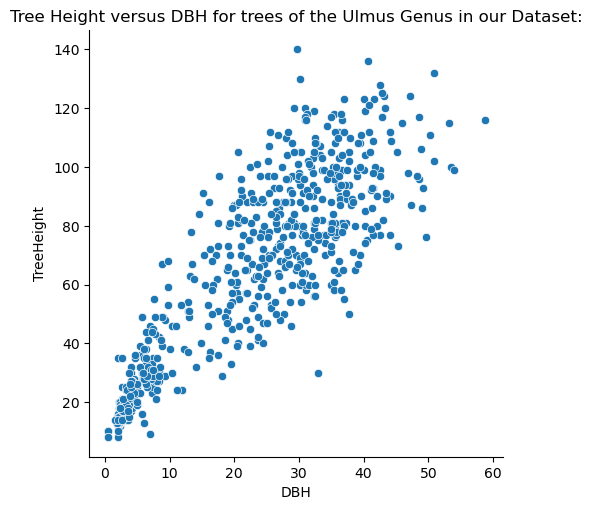

In [28]:
# Graph 1
# Isolate the Ulmus Genus from the rest of the Genus options:
Ulmus = dataset[(dataset ['Genus'] == 'Ulmus')]

# Create a scatterplot for trees of the Ulmus genus with DBH on the x-axis and Tree Height on the y-axis using Seaborn
sns.relplot(x="DBH", y="TreeHeight", data=Ulmus)

# Set label for chart
plt.title("Tree Height versus DBH for trees of the Ulmus Genus in our Dataset:")

Text(0.5, 1.0, 'Tree Height versus DBH for trees of the Ulmus Genus mapped by Genus Species in our Dataset')

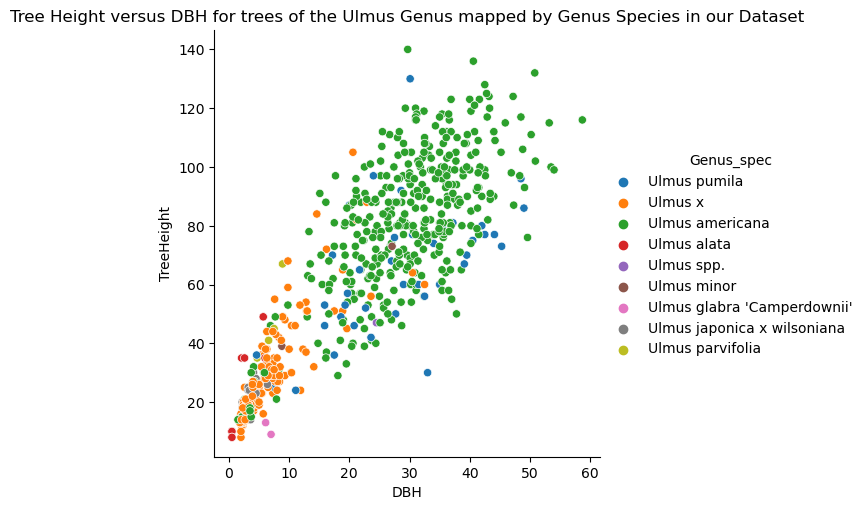

In [29]:
# Graph 2
# Create a scatterplot for trees of the Ulmus genus with DBH on the x-axis, Tree Height on the y-axis, and Genus Species as the hue using Seaborn
sns.relplot(x="DBH", y="TreeHeight", hue="Genus_spec", data=Ulmus)

# Set label for chart
plt.title("Tree Height versus DBH for trees of the Ulmus Genus mapped by Genus Species in our Dataset")

Text(0.5, 1.0, 'Boxplot of the DBH of different Ulmus Genus mapped by Species')

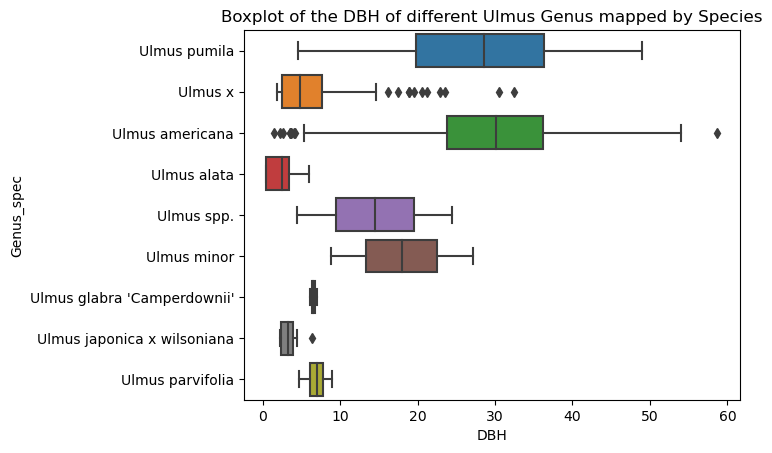

In [30]:
# Graph 3
# Create a boxplot of DBH for trees in the Ulmus Genus by Genus Species
sns.boxplot(x="DBH", y="Genus_spec", data=Ulmus)

# Set label for chart
plt.title("Boxplot of the DBH of different Ulmus Genus mapped by Species")

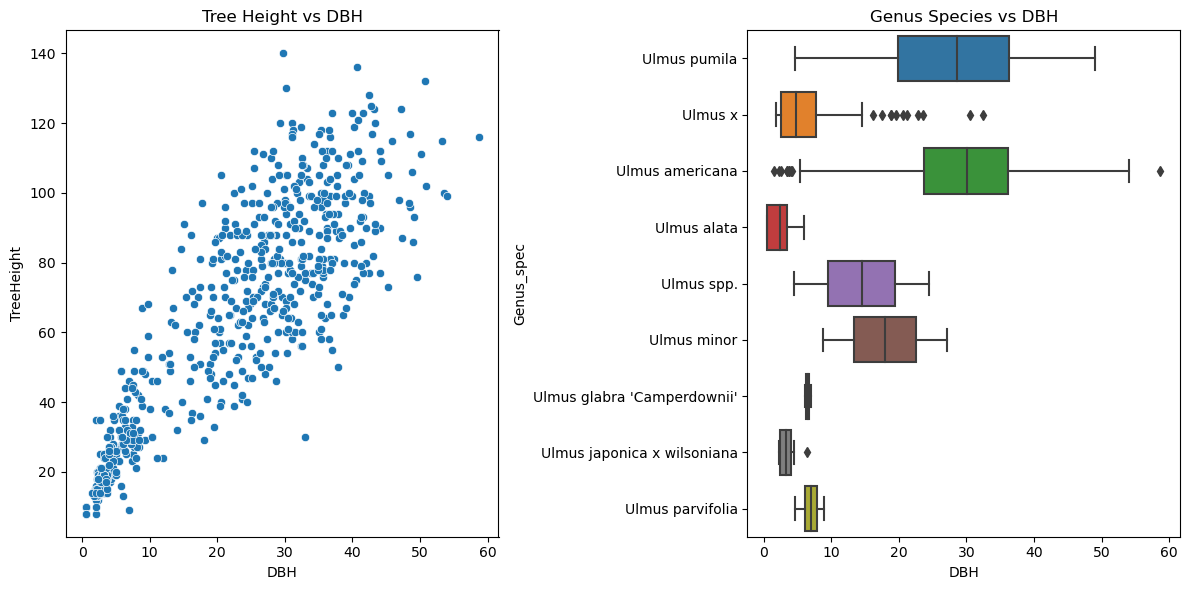

In [31]:
# Graph 4: Display Graphs 1 and 3 next to each other

# Create a grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# List Graph 1:
sns.scatterplot(x="DBH", y="TreeHeight", data=Ulmus, ax=axes[0])
axes[0].set_title("Tree Height vs DBH")

# List Graph 3:
sns.boxplot(x="DBH", y="Genus_spec", data=Ulmus, ax=axes[1])
axes[1].set_title("Genus Species vs DBH")


# Layout graphs: 
plt.tight_layout()
# Show plots:
plt.show()

In [32]:
# Part 3 is now complete.

In [33]:
# Part 4: Python GeoPandas
# Task 1: Read the dataset you download as a GeoPandas DataFrame

In [ ]:
pip install geopandas

In [ ]:
pip install pandas

In [ ]:
pip install shapely

In [ ]:
pip install fiona

In [38]:
# Load the dataset
dataset4 = '/arcgis/home/pub_lnatr.shp'

In [39]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [ ]:
#Reading File
GeoDataFrame = gpd.read_file('/arcgis/home/pub_lnatr.shp')

# Preview Dataframe
print(GeoDataFrame.head())

In [41]:
# Visualize the dataset
GeoDataFrame.head()

,pa_code,site_name,local_auth,habitat,date_desig,notes,policy_ref,url,site_area,la_s_code,sh_date_up,sh_src,sh_src_id,geometry
0,8131,Den of Maidencraig,Aberdeen City,"woodland, grassland",1992-11-25,None,None,https://www.aberdeencity.gov.uk/services/leisu...,14.82,S12000033,2024-11-12,f86bd494-75b1-47e7-84cb-038732518ac8,4.0,"POLYGON ((3.88e+05 8.06e+05, 3.88e+05 8.06e+05..."
1,8132,Donmouth,Aberdeen City,"mud flats, dunes, saltmarsh, woodland",1992-11-25,None,None,https://www.aberdeencity.gov.uk/services/leisu...,36.72,S12000033,2024-11-12,f86bd494-75b1-47e7-84cb-038732518ac8,2.0,"MULTIPOLYGON (((3.94e+05 8.1e+05, 3.94e+05 8.1..."
2,8145,Kincorth Hill,Aberdeen City,"heathland, scrub, grassland, woodland",1997-01-09,None,None,https://www.aberdeencity.gov.uk/services/leisu...,42.25,S12000033,2024-11-12,f86bd494-75b1-47e7-84cb-038732518ac8,3.0,"POLYGON ((3.93e+05 8.02e+05, 3.93e+05 8.02e+05..."
3,8137,Scotstown Moor,Aberdeen City,"bog, heathland, grassland, woodland",1994-04-29,None,None,https://www.aberdeencity.gov.uk/services/leisu...,51.66,S12000033,2024-11-12,f86bd494-75b1-47e7-84cb-038732518ac8,1.0,"MULTIPOLYGON (((3.94e+05 8.11e+05, 3.94e+05 8...."
4,8128,ARNHALL MOSS,Aberdeenshire,"bog, woodland",1992-11-22,The site is a remnant of raised bog succeeding...,None,http://www.aberdeenshire.gov.uk/natural/conser...,9.00,S12000034,2021-09-30,3c15f515-0e8b-4828-b55c-781fbe84f1bc,2.0,"POLYGON ((3.83e+05 8.07e+05, 3.83e+05 8.07e+05..."


In [42]:
# Task 2: Use the correct code to plot the first 5 and last 5 sets of records in your selected dataset
# Sort dataset4 by pa_code
dfpa_codesort = GeoDataFrame.sort_values(by='pa_code', ascending=False)

# Isolate the first five results:
dfpa_codesort.sort_values('pa_code').head(5)

,pa_code,site_name,local_auth,habitat,date_desig,notes,policy_ref,url,site_area,la_s_code,sh_date_up,sh_src,sh_src_id,geometry
31,8122,Aberlady Bay Nature Reserve,East Lothian,"saltmarsh, dunes, grassland",1952-06-01,None,None,https://www.eastlothian.gov.uk/info/210569/cou...,607.26,S12000010,2023-08-02,67a0a80d-bc52-4de0-ab5c-684fb27fc41e,1.0,"POLYGON ((3.47e+05 6.83e+05, 3.47e+05 6.83e+05..."
18,8123,Castle and Hightae Lochs,Dumfries and Galloway,"open water, woodland, grassland",1962-01-10,None,None,http://www.castleloch.org.uk,137.39,S12000006,2018-09-25,e515c823-1b6f-4038-b607-49c8ee8379d4,2.0,"MULTIPOLYGON (((3.08e+05 5.81e+05, 3.08e+05 5...."
36,8124,Eden Estuary,Fife,"intertidal mud/sand flats, saltmarsh",1978-09-27,None,None,http://fifecoastandcountrysidetrust.co.uk/Loca...,927.10,S12000047,2024-11-12,46c511dd-7790-4193-84dc-223be492cefd,2.0,"POLYGON ((3.49e+05 7.22e+05, 3.49e+05 7.22e+05..."
14,8125,Gartmorn Dam,Clackmannanshire,"open water, woodland, grassland",1980-07-21,None,None,http://www.clacksweb.org.uk/visiting/gartmorndam/,42.33,S12000005,2016-01-01,ebc66ab1-8710-4d50-a786-aaf1291f575d,1.0,"POLYGON ((2.92e+05 6.95e+05, 2.92e+05 6.95e+05..."
7,8126,Montrose Basin,Angus,"estuarine basin, brackish water, freshwater",None,None,None,http://www.montrosebasin.org.uk/,1019.94,S12000041,2024-11-12,None,NaN,"POLYGON ((3.67e+05 7.57e+05, 3.67e+05 7.57e+05..."


In [43]:
# Isolate the last five results:
dfpa_codesort.sort_values('pa_code').tail(5)

,pa_code,site_name,local_auth,habitat,date_desig,notes,policy_ref,url,site_area,la_s_code,sh_date_up,sh_src,sh_src_id,geometry
83,10578,"Greenhall, Milheugh and Barnhill",South Lanarkshire,Mature broadleaved riparian woodland dominates...,2022-01-27,New LNR designated,Policy 14 Natural and historic environment/ NH...,https://www.southlanarkshire.gov.uk/info/20016...,30.14,S12000029,2023-01-10,1e8fff90-4d7f-4723-bc09-1f9d163e6950,15.0,"MULTIPOLYGON (((2.68e+05 6.58e+05, 2.68e+05 6...."
84,10579,Hamilton Low Parks,South Lanarkshire,Comprised of sections of the Clyde floodplain ...,2022-01-27,New LNR designated,Policy 14 Natural and historic environment/ NH...,https://www.southlanarkshire.gov.uk/info/20016...,136.06,S12000029,2023-01-10,1e8fff90-4d7f-4723-bc09-1f9d163e6950,1.0,"MULTIPOLYGON (((2.74e+05 6.56e+05, 2.74e+05 6...."
91,10580,Milton,South Lanarkshire,Herb-rich grassland with clusters of trees and...,2022-01-27,New LNR designated,Policy 14 Natural and historic environment/ NH...,https://www.southlanarkshire.gov.uk/info/20016...,14.37,S12000029,2023-01-10,1e8fff90-4d7f-4723-bc09-1f9d163e6950,5.0,"MULTIPOLYGON (((2.84e+05 6.5e+05, 2.84e+05 6.5..."
51,10595,Hurlet Hill,Glasgow City,None,None,Declared,LNR016,None,14.85,S12000049,2024-11-12,77f2cb94-e568-48ff-af96-8e537619694c,21.0,"POLYGON ((2.51e+05 6.62e+05, 2.51e+05 6.62e+05..."
53,10597,Festival Park,Glasgow City,None,None,Declared,LNR015,None,4.47,S12000049,2024-11-12,77f2cb94-e568-48ff-af96-8e537619694c,14.0,"POLYGON ((2.57e+05 6.65e+05, 2.57e+05 6.65e+05..."


In [ ]:
pip install geodatasets

In [ ]:
from geodatasets import get_path 

!pip install folium matplotlib mapclassify


In [46]:
# Task 3 create a map of your dataset using a categorical attribute
# Load shapefile
GeoDataFrame = gpd.read_file('/arcgis/home/pub_lnatr.shp')

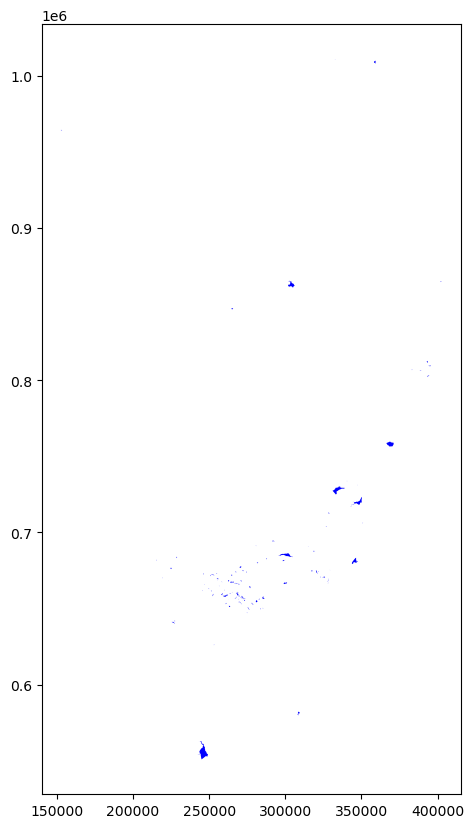

In [49]:
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(1,1, figsize=(10, 10))

#Plot GeoDataFrame2
GeoDataFrame.plot(ax=ax, color='blue')

# create explore map
GeoDataFrame.explore()

#Display Plot
plt.show()

In [50]:
# Task 4: Finding the Coordinate Reference System for the Dataset
# Get and Print the CRS: 
print(GeoDataFrame.crs)

None


In [51]:
# Task 5: How many features does this dataset contain?
# Features are equivalent to rows, so to determine the number of features we can count the rows
len(GeoDataFrame)

#Count the features:
print("Number of Features in Dataset:", len(GeoDataFrame))

Number of Features in Dataset: 100


In [ ]:
# Task 6: Filter data based on a categorical attribute 
# Isolate your categorical attribute
CatAttGeoDataFrame = GeoDataFrame[GeoDataFrame['local_auth'] == 'Fife']

#Check your filtered dataframe
print(CatAttGeoDataFrame)

In [ ]:
# Task 7: Filter data based on a numerical attribute 
# Isolate your numerical attribute
NumAttGeoDataFrame1 = GeoDataFrame[GeoDataFrame['site_area'] > 200]

#Check your filtered dataframe
print(NumAttGeoDataFrame1)

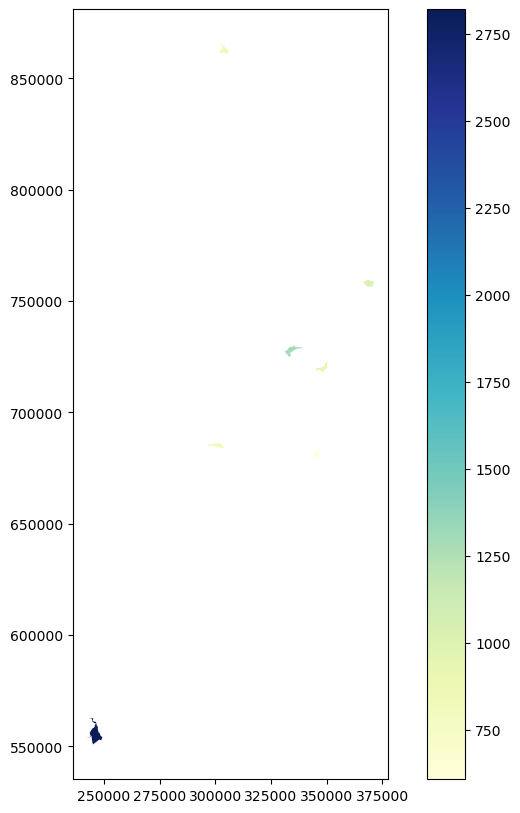

In [54]:
# Task 8: Plot the new/filtered geopandas dataframe using a numerical attribute
# Use NumAttGeoDataFrame1 to plot the areas larger than 200.
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(1,1, figsize=(10, 10))

#Plot NumAttGeoDataFrame1
NumAttGeoDataFrame1.plot(column='site_area',
                        cmap='YlGnBu',
                        legend=True,
                        ax=ax)
#Display Plot
plt.show()

In [55]:
# This concludes Part 4

In [56]:
# Part 5: Python Rasterio

In [ ]:
pip install earthpy rasterio

In [58]:
import rasterio
import numpy as np
%matplotlib inline

In [59]:
# Task 1: Read file as a rasterio dataset
# Open file
ElevationRaster = rasterio.open('/arcgis/home/elev.tif')

# Check type of the variable 'ElevationRaster'
type(ElevationRaster)


rasterio.io.DatasetReader

In [60]:
#Task 2: Find the CRS of the Dataset
print(ElevationRaster.crs)
print("The CRS of the Dataset is:", ElevationRaster.crs)

EPSG:32617
The CRS of the Dataset is: EPSG:32617


In [61]:
# Task 3: Describe the Raster Dataset regarding Raster Extent (Bounds), the Reference System, and how many bands are in the Dataset

In [62]:
# Find the raster extend (bounds)
print(ElevationRaster.bounds)
print("The Bounds of ElevationRaster are:", ElevationRaster.bounds)

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
The Bounds of ElevationRaster are: BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)


In [63]:
# Find the Reference System (This is the same as finding the Dataset's CRS)
print(ElevationRaster.crs)
print("The Reference System of the Dataset is:", ElevationRaster.crs)

EPSG:32617
The Reference System of the Dataset is: EPSG:32617


In [64]:
# Find how many bands are in the dataset
print(ElevationRaster.count)
print("There are", ElevationRaster.count, "bands in this dataset")

1
There are 1 bands in this dataset


In [65]:
# Compile the information about the raster dataset nicely
print("The Reference System is", ElevationRaster.crs,", the bounds of the raster are", ElevationRaster.bounds,",and there are", ElevationRaster.count, "bands in this dataset")

The Reference System is EPSG:32617 , the bounds of the raster are BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138) ,and there are 1 bands in this dataset


In [66]:
# Task 4: Create a plot/map of the raster dataset

In [67]:
# Import show from rasterio.plot
from rasterio.plot import show

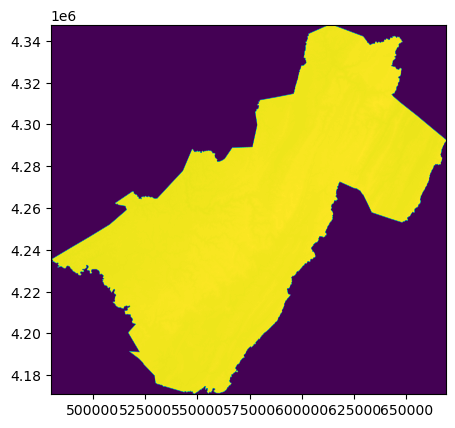

<AxesSubplot: >

In [68]:
# Reveal the raster
show((ElevationRaster, 1))

In [69]:
# Create Histograms from the Raster

In [70]:
# Import show_hist from rasterio.plot
from rasterio.plot import show_hist

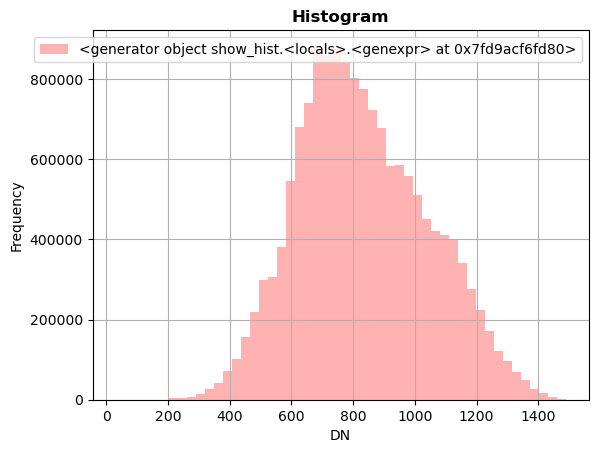

In [71]:
# Reveal the histogram
show_hist(ElevationRaster, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')